In [1]:
!pip install pandas networkx matplotlib openpyxl

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

# check the working directory
cwd = os.getcwd()
print(cwd)

In [17]:
# Read the Excel files
all_AKI_genes = pd.read_excel('./AKI gene pairs.xlsx', dtype=str)
all_CKD_genes = pd.read_excel('./CKD gene pairs.xlsx', dtype=str)

# Remove " hits" and convert the fourth column to integers
all_AKI_genes.iloc[:, 3] = all_AKI_genes.iloc[:, 3].str.replace(' hits', '').astype(int)
all_CKD_genes.iloc[:, 3] = all_CKD_genes.iloc[:, 3].str.replace(' hits', '').astype(int)


In [18]:
# Create a graph
G = nx.Graph()

# Function to add edges to the graph
def add_edges(df, color, unique_set):
    for i in range(len(df)):
        gene1 = df.iloc[i, 1]
        gene2 = df.iloc[i, 2]
        weight = df.iloc[i, 3]
        G.add_edge(gene1, gene2, color=color, weight=weight, unique=unique_set)
        #print(f"Added edge: {gene1} - {gene2} with weight: {weight}")  # Print edge details

# Add edges for AKI and CKD
add_edges(all_AKI_genes, 'red', 'AKI')
add_edges(all_CKD_genes, 'blue', 'CKD')

Added edge: AAVS1 - GYPA with weight: 1
Added edge: AAVS1 - MPO with weight: 1
Added edge: AAVS1 - PRTN3 with weight: 1
Added edge: ACE - REN with weight: 1
Added edge: ACSL4 - MT-CO2 with weight: 1
Added edge: ACSL4 - PTGS2 with weight: 1
Added edge: ACTC1 - MKI67 with weight: 1
Added edge: AGT - AKT1 with weight: 1
Added edge: AGT - EGF with weight: 1
Added edge: AGT - EGFR with weight: 1
Added edge: AGT - HMOX1 with weight: 1
Added edge: AGT - IAPP with weight: 1
Added edge: AGT - MAPK1 with weight: 1
Added edge: AGTR1 - ACE with weight: 1
Added edge: AIP - CCL4 with weight: 1
Added edge: AIP - HAVCR1 with weight: 1
Added edge: AKR1B1 - AKR1A1 with weight: 1
Added edge: AKT1 - BCL2L11 with weight: 1
Added edge: AKT1 - CCL2 with weight: 1
Added edge: AKT1 - HMOX1 with weight: 2
Added edge: AKT1 - IAPP with weight: 1
Added edge: AKT1 - IL1B with weight: 1
Added edge: AKT1 - IL6 with weight: 1
Added edge: AKT1 - JAK2 with weight: 1
Added edge: AKT1 - JUP with weight: 1
Added edge: AKT1

In [19]:
# Add common edges with average weights
common_pairs = set(tuple(sorted([all_AKI_genes.iloc[i, 1], all_AKI_genes.iloc[i, 2]])) for i in range(len(all_AKI_genes))) & \
               set(tuple(sorted([all_CKD_genes.iloc[i, 1], all_CKD_genes.iloc[i, 2]])) for i in range(len(all_CKD_genes)))

# Calculate unique pairs for AKI and CKD
unique_AKI_pairs = set(tuple(sorted([all_AKI_genes.iloc[i, 1], all_AKI_genes.iloc[i, 2]])) for i in range(len(all_AKI_genes))) - common_pairs
unique_CKD_pairs = set(tuple(sorted([all_CKD_genes.iloc[i, 1], all_CKD_genes.iloc[i, 2]])) for i in range(len(all_CKD_genes))) - common_pairs


In [20]:
# check how many gene pairs we have
print(f"Number of common pairs: {len(common_pairs)}")
print(f"Number of unique AKI pairs: {len(unique_AKI_pairs)}")
print(f"Number of unique CKD pairs: {len(unique_CKD_pairs)}")


Number of common pairs: 82
Number of unique AKI pairs: 617
Number of unique CKD pairs: 405


In [23]:
# Iterate through common pairs
for pair in common_pairs:
    gene1, gene2 = pair
    
    # Print the current genes being processed
    print(f"Processing pair: gene1 = {gene1}, gene2 = {gene2}")
    
    try:
        # Check both possible orders in the AKI dataset
        aki_genes_filtered = all_AKI_genes[
            ((all_AKI_genes.iloc[:, 1] == gene1) & (all_AKI_genes.iloc[:, 2] == gene2)) |
            ((all_AKI_genes.iloc[:, 1] == gene2) & (all_AKI_genes.iloc[:, 2] == gene1))
        ]
        
        # Check both possible orders in the CKD dataset
        ckd_genes_filtered = all_CKD_genes[
            ((all_CKD_genes.iloc[:, 1] == gene1) & (all_CKD_genes.iloc[:, 2] == gene2)) |
            ((all_CKD_genes.iloc[:, 1] == gene2) & (all_CKD_genes.iloc[:, 2] == gene1))
        ]
        
        # Ensure both filters found a match
        if aki_genes_filtered.empty or ckd_genes_filtered.empty:
            raise IndexError("No matching pair found in one or both datasets.")
        
        # Calculate weights
        avg_weight = (aki_genes_filtered.iloc[0, 3] + ckd_genes_filtered.iloc[0, 3]) / 2
        
        # Add edge to graph
        G.add_edge(gene1, gene2, color='green', weight=avg_weight, unique='common')
    
    except IndexError as e:
        print(f"Error processing pair: gene1 = {gene1}, gene2 = {gene2}")
        print(f"Error message: {e}")
        # Continue to the next pair
        continue


Processing pair: gene1 = CD46, gene2 = CFH
Processing pair: gene1 = EGFR, gene2 = ERBB2
Processing pair: gene1 = NFE2L2, gene2 = PTGS2
Processing pair: gene1 = BCL2, gene2 = PRKAA2
Processing pair: gene1 = GPX4, gene2 = HDAC3
Processing pair: gene1 = PLG, gene2 = TGFB2
Processing pair: gene1 = CASP1, gene2 = IL1B
Processing pair: gene1 = COL23A1, gene2 = PROC
Processing pair: gene1 = IL6, gene2 = TNF
Processing pair: gene1 = GPX4, gene2 = KLF5
Processing pair: gene1 = HDAC3, gene2 = KLF5
Processing pair: gene1 = NLGN4X, gene2 = TGFB2
Processing pair: gene1 = PLG, gene2 = TGFA
Processing pair: gene1 = ACE, gene2 = REN
Processing pair: gene1 = HAVCR1, gene2 = LCN2
Processing pair: gene1 = NLGN4X, gene2 = TGFA
Processing pair: gene1 = NLGN4X, gene2 = PLG
Processing pair: gene1 = ANGPT1, gene2 = ANGPT2
Processing pair: gene1 = CYP2B6, gene2 = TBXAS1
Processing pair: gene1 = CASP1, gene2 = GSDM1
Processing pair: gene1 = BAX, gene2 = BCL2
Processing pair: gene1 = ENPP6, gene2 = TGFB2
Process

In [31]:
# Centrality analysis
degree_dict = dict(G.degree())
nx.set_node_attributes(G, degree_dict, 'degree')


{'AAVS1': 5, 'GYPA': 3, 'MPO': 6, 'PRTN3': 3, 'ACE': 5, 'REN': 13, 'ACSL4': 3, 'MT-CO2': 4, 'PTGS2': 10, 'ACTC1': 9, 'MKI67': 10, 'AGT': 10, 'AKT1': 29, 'EGF': 7, 'EGFR': 17, 'HMOX1': 35, 'IAPP': 7, 'MAPK1': 7, 'AGTR1': 4, 'AIP': 5, 'CCL4': 5, 'HAVCR1': 19, 'AKR1B1': 1, 'AKR1A1': 1, 'BCL2L11': 21, 'CCL2': 39, 'IL1B': 48, 'IL6': 39, 'JAK2': 21, 'JUP': 28, 'NFE2L2': 32, 'PPARGC1A': 21, 'PRKAA2': 26, 'SETD2': 21, 'SIRT1': 38, 'SMAD2': 22, 'STAT3': 23, 'VEGFA': 26, 'ALB': 15, 'CKB': 5, 'SPP1': 4, 'VKORC1': 2, 'ANGPT1': 1, 'ANGPT2': 1, 'BAX': 20, 'CASP8': 8, 'CASP9': 8, 'CYCS': 2, 'FOXO3': 8, 'NR5A2': 6, 'PGAM5': 3, 'PIK3CA': 29, 'PRKAA1': 8, 'BCL2': 33, 'CASP3': 36, 'TP53': 12, 'BCS1L': 3, 'IGFBP7': 3, 'C10orf59': 1, 'MAOB': 1, 'CASP1': 7, 'IL18': 9, 'GSDM1': 5, 'MAPK3': 23, 'MMRN1': 21, 'PECAM1': 5, 'S100A4': 5, 'TNF': 19, 'CXCL10': 9, 'IL13': 9, 'CD19': 1, 'ABCC6': 1, 'CD4': 4, 'CD8A': 4, 'FCER1G': 4, 'KCNQ5': 4, 'CD44': 3, 'CXCL5': 3, 'MAPK15': 3, 'CD46': 5, 'CFH': 5, 'CD68': 1, 'FAS': 

In [25]:
# Draw the network
pos = nx.spring_layout(G)
node_sizes = [v * 100 for v in degree_dict.values()]  # Scale node sizes
edge_colors = [G[u][v]['color'] for u, v in G.edges()]


C:\Users\juhur\AppData\Local\Temp\ipykernel_18520\173231489.py:3: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edge_color=edge_colors)


{'AAVS1': Text(0.3120690128522815, -0.09891120784052795, 'AAVS1'),
 'GYPA': Text(0.26634480995683757, -0.09790174807205007, 'GYPA'),
 'MPO': Text(0.19533883080507283, -0.07979021168298811, 'MPO'),
 'PRTN3': Text(0.2651411909034048, -0.10540415357515384, 'PRTN3'),
 'ACE': Text(0.018315909168259096, 0.033793215994121106, 'ACE'),
 'REN': Text(0.06803578508707145, 0.09450439234777867, 'REN'),
 'ACSL4': Text(0.17441168626044593, -0.04386114645807832, 'ACSL4'),
 'MT-CO2': Text(0.17276021330420846, -0.053236337238462675, 'MT-CO2'),
 'PTGS2': Text(0.1186699196583684, -0.04916804368567546, 'PTGS2'),
 'ACTC1': Text(-0.008232776038105608, -0.04847826035948804, 'ACTC1'),
 'MKI67': Text(0.04253188287932748, -0.08596440575932625, 'MKI67'),
 'AGT': Text(-0.00024148701337070428, -0.0420033152768311, 'AGT'),
 'AKT1': Text(0.03379074506292796, -0.06098203470668092, 'AKT1'),
 'EGF': Text(0.00926252786052615, -0.08302659316317247, 'EGF'),
 'EGFR': Text(-0.0048197597823998, -0.07162320829644453, 'EGFR'),
 

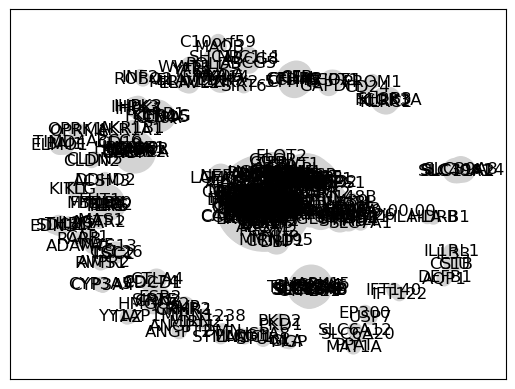

In [26]:
# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightgray')
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
nx.draw_networkx_labels(G, pos)


In [28]:
# Save the network as an image
plt.title("Gene Interaction Network")
plt.axis('off')
plt.savefig('./gene_network.png', format='png')
plt.close()

In [30]:
# Save the graph to an XML file
nx.write_graphml(G, './gene_network.graphml')